# Gathering Data

In [ ]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
# read data
df_traffic_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
# read first five rows
df_traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
# read last five rows
df_traffic_data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [ ]:
# detect how many rows and columns
df_traffic_data.shape

(48204, 9)

In [ ]:
df_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
# setect how many null values
df_traffic_data.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [ ]:
# statistical properties for numeric columns
df_traffic_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
# detect min and max date to see how many years
print(df_traffic_data.date_time.max())
print(df_traffic_data.date_time.min())

2018-09-30 23:00:00
2012-10-02 09:00:00


In [ ]:
# detect min and max traffic volume to detect threshold point
print(df_traffic_data.traffic_volume.max())
print(df_traffic_data.traffic_volume.min())

7280
0


In [ ]:
# choose threshold point
threshold_point=(df_traffic_data.traffic_volume.max()+df_traffic_data.traffic_volume.min())/2
threshold_point

3640.0

## notes 
## 1 represent high volume
## 0 represent normal to low volume

In [ ]:
# classify the data basedc on threshold point
df_traffic_data['traffic_volume_classification'] = np.where(df_traffic_data['traffic_volume']>= threshold_point, 1, 0)
df_traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,traffic_volume_classification
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1


In [ ]:
# detect if the data is balanced or not
df_traffic_data.traffic_volume_classification.value_counts()

0    25553
1    22651
Name: traffic_volume_classification, dtype: int64

this is a balance data 

In [ ]:
# save traffic volume colums
traffic_volume=df_traffic_data['traffic_volume']
traffic_volume

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 48204, dtype: int64

In [ ]:
# drop traffic volume column and continue as classification problem
df_traffic_data.drop('traffic_volume',inplace=True,axis=1)

In [ ]:
# display first 5 rows
df_traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume_classification
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,1


# Explore Data Analysis

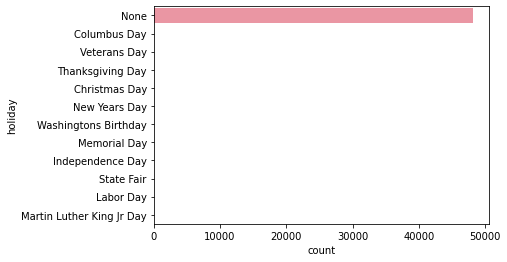

In [ ]:
#count number of non holiday and holiday days
sns.countplot(y='holiday', data = df_traffic_data)

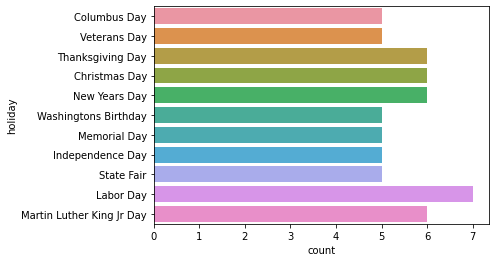

In [ ]:
# count number of holiday days
holidays = df_traffic_data.loc[df_traffic_data.holiday != 'None']
sns.countplot(y='holiday', data= holidays)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


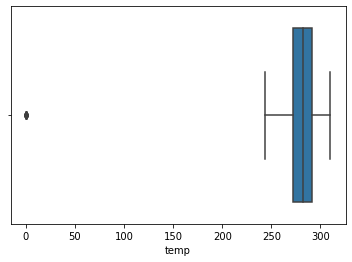

In [ ]:
# box plot for temperture column to detect outliers
sns.boxplot('temp', data = df_traffic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


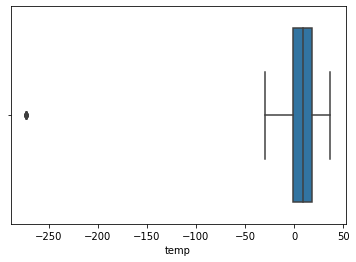

In [ ]:
#convert kelvin to celsius
#the relation is (0K − 273.15)
df_traffic_data['temp'] = (df_traffic_data['temp']-273.15)
sns.boxplot('temp', data = df_traffic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


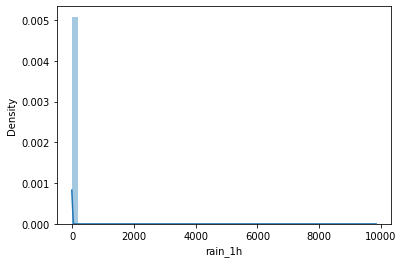

In [ ]:
#Plotting rain variable
sns.distplot(df_traffic_data.rain_1h)
#From the distribution, it shows that the data is extremely skewed. Most of the observations are concentrated around 0.

(array([44737.,     0.,   984.,   272.,    85.,   301.,   131.,   142.,
           56.,    85.]),
 array([0.   , 0.098, 0.196, 0.294, 0.392, 0.49 , 0.588, 0.686, 0.784,
        0.882, 0.98 ]),
 <a list of 10 Patch objects>)

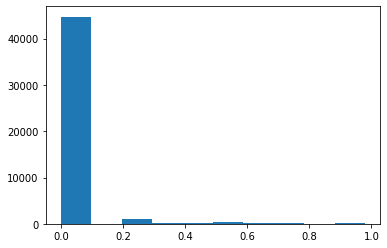

In [ ]:
#Plotting observations with values less than 1mm rain shows that more than 40000 observations are around 0.
plt.hist(df_traffic_data.rain_1h.loc[df_traffic_data.rain_1h<1])

(array([4.8155e+04, 2.0000e+01, 6.0000e+00, 3.0000e+00, 7.0000e+00,
        0.0000e+00, 5.0000e+00, 0.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([0.   , 0.051, 0.102, 0.153, 0.204, 0.255, 0.306, 0.357, 0.408,
        0.459, 0.51 ]),
 <a list of 10 Patch objects>)

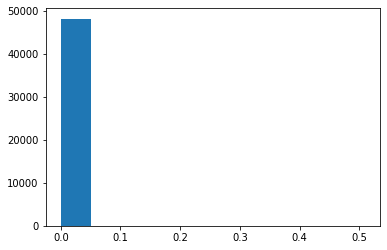

In [ ]:
#Plotting snow variable indicates that data is again skewed and most of the observations have value close to 0.0.
plt.hist(df_traffic_data.snow_1h)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


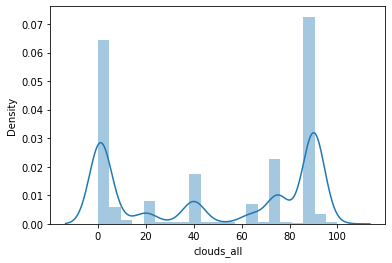

In [ ]:
#clouds_all indicates the cloud coverage for the give day and hour
sns.distplot(df_traffic_data.clouds_all)

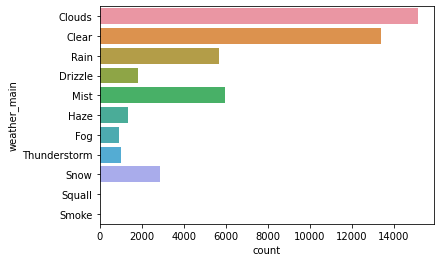

In [ ]:
# count different categories in weather_main
sns.countplot(y='weather_main', data=df_traffic_data)

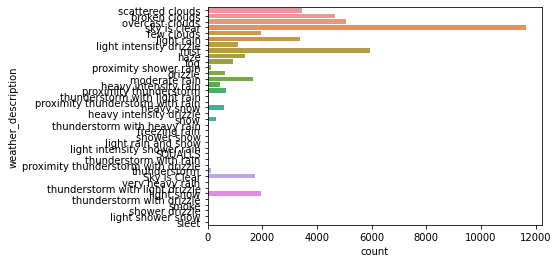

In [ ]:
#count different categories in weather_description
sns.countplot(y='weather_description', data=df_traffic_data)

In [ ]:
 !pip install pandas-profiling==2.7.1

In [ ]:
# explore data usin pandas profile and extract HTML report
import pandas_profiling
profile = pandas_profiling.ProfileReport(df_traffic_data)
profile.to_file("EDA_REPORT.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

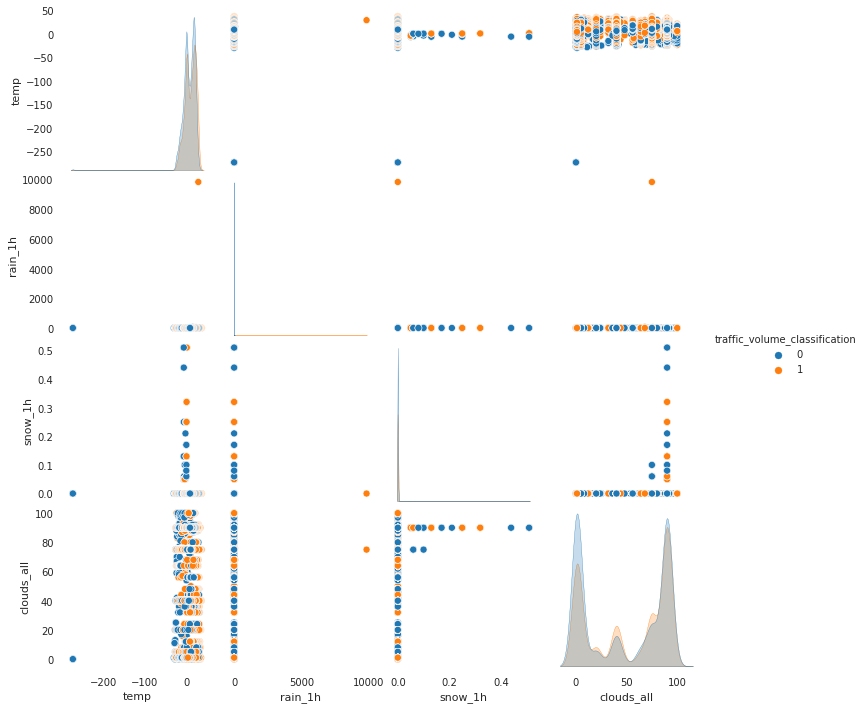

In [ ]:
# multivariate analysis based on classification classes
sns.pairplot(df_traffic_data,hue='traffic_volume_classification')

In [ ]:
#copying data to new data frame
df_traffic_features = df_traffic_data.copy()

In [ ]:
#Extracting features from date_time variable
df_traffic_features['date_time'] = pd.to_datetime(df_traffic_features.date_time)
df_traffic_features['weekday'] = df_traffic_features.date_time.dt.weekday
df_traffic_features['date'] = df_traffic_features.date_time.dt.date
df_traffic_features['hour'] = df_traffic_features.date_time.dt.hour
df_traffic_features['month'] = df_traffic_features.date_time.dt.month
df_traffic_features['year'] = df_traffic_features.date_time.dt.year
#Monday is 0 and Sunday is 6

In [ ]:
df_traffic_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume_classification,weekday,date,hour,month,year
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,1,1,2012-10-02,9,10,2012
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,1,1,2012-10-02,10,10,2012
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,1,1,2012-10-02,11,10,2012
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,1,1,2012-10-02,12,10,2012
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,1,1,2012-10-02,13,10,2012


In [ ]:
#categorizing hours to different time periods like morning, afternoon etc
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df_traffic_features['hour'] = df_traffic_features.hour.map(hour_modify)

In [ ]:
#Other holidays are very sparse compared to none holidays. 
#Hence encoding the holidays as TRUE and none Holidays as FALSE

def modify_holiday(x):
    if x == 'None':
        return False
    else:
        return True
df_traffic_features['holiday'] = df_traffic_features['holiday'].map(modify_holiday)

In [ ]:
#Outlier in temp which was detected earlier needs to be removed
df_traffic_features = df_traffic_features.loc[df_traffic_features.temp>-250]

In [ ]:
# convert to lower case
df_traffic_features['weather_description'] = df_traffic_features['weather_description'].map(lambda x:x.lower())

In [ ]:
#Any row containing "thunderstorm" is replaced by "thunderstorm"
df_traffic_features.loc[df_traffic_features['weather_description'].str.contains('thunderstorm'),'weather_description'] = 'thunderstorm'  

In [ ]:
weather = ['thunderstorm','mist','fog','haze']
df_traffic_features.loc[np.logical_not(df_traffic_features['weather_description'].isin(weather)),'weather_description'] = 'other'

In [ ]:
#creating dummy variables for these newly created categories in weather description
df_traffic_features = pd.get_dummies(columns=['weather_description'],data=df_traffic_features)

In [ ]:
# make a rename for weather description
df_traffic_features.rename(columns={'weather_description_fog':'fog', 'weather_description_haze':'haze',
                                   'weather_description_mist':'mist', 'weather_description_thunderstorm':'thunderstorm'}, inplace = True)
df_traffic_features.drop(columns = ['weather_description_other', 'weather_main'], inplace = True)

In [ ]:

df_traffic_features.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'date_time',
       'traffic_volume_classification', 'weekday', 'date', 'hour', 'month',
       'year', 'fog', 'haze', 'mist', 'thunderstorm'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


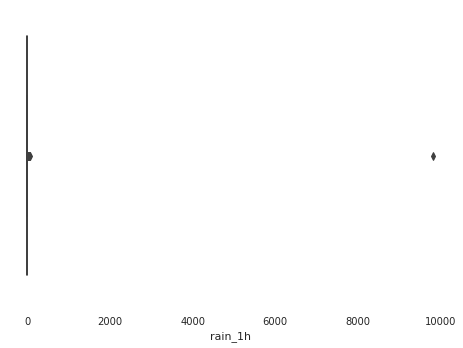

In [ ]:
# box blot for detect outliers
sns.boxplot('rain_1h',data = df_traffic_features)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


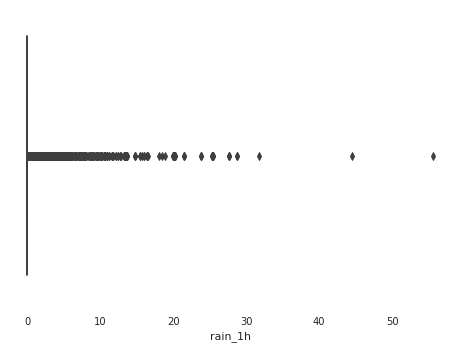

In [ ]:
sns.boxplot('rain_1h',data = df_traffic_features.loc[df_traffic_features.rain_1h<2000])

In [ ]:
#Removing outlier in rain column and converting numeric data to categories
#rain value equal to 0.0 as no_rain
#rain value greater than 0.0 is cut into 3 quantiles

df_traffic_features = df_traffic_features.loc[df_traffic_features.rain_1h<2000]
df_traffic_features_temp = df_traffic_features.loc[df_traffic_features.rain_1h>0]
rain_q = pd.DataFrame(pd.qcut(df_traffic_features_temp['rain_1h'] ,q=3, labels=['light','moderate','heavy']))
df_traffic_cat = df_traffic_features.merge(rain_q,left_index=True, right_index=True, how='left')
df_traffic_cat['rain_1h_y'] = df_traffic_cat.rain_1h_y.cat.add_categories('no_rain')
df_traffic_cat['rain_1h_y'].fillna('no_rain', inplace = True) #no_rain is not in the category, adding it and filling

df_traffic_cat.drop(columns=['rain_1h_x'], inplace = True)
df_traffic_cat.rename(columns={'rain_1h_y':'rain_1h'}, inplace = True)
df_traffic_cat.head()

,holiday,temp,snow_1h,clouds_all,date_time,traffic_volume_classification,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,False,15.13,0.0,40,2012-10-02 09:00:00,1,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
1,False,16.21,0.0,75,2012-10-02 10:00:00,1,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
2,False,16.43,0.0,90,2012-10-02 11:00:00,1,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
3,False,16.98,0.0,90,2012-10-02 12:00:00,1,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain
4,False,17.99,0.0,75,2012-10-02 13:00:00,1,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


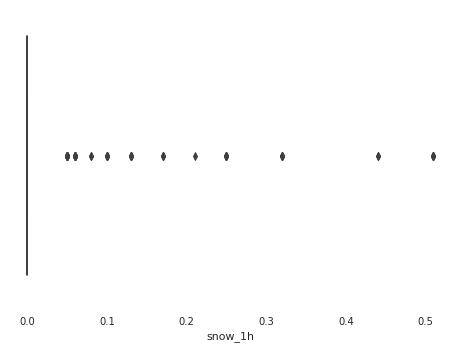

In [ ]:
#Plotiing snow data shows that it is extremely skewed as observed during univariate analysis
sns.boxplot('snow_1h',data = df_traffic_features)

In [ ]:
#only 63 observations have snow greater than 0.0, it can be encoded as no_snow and 
df_traffic_features.snow_1h[df_traffic_features.snow_1h>0].count()
#63 columns -> change to snow, no_snow

63

In [ ]:
# convert snow_1h column to snow and no snow
def modify_snow1h(x):
    if x==0:
        return 'no_snow'
    else:
        return 'snow'
    
df_traffic_features['snow_1h'] = df_traffic_cat.snow_1h.map(modify_snow1h)

In [ ]:
df_traffic_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume_classification,weekday,date,hour,month,year,fog,haze,mist,thunderstorm
0,False,15.13,0.0,no_snow,40,2012-10-02 09:00:00,1,1,2012-10-02,Morning,10,2012,0,0,0,0
1,False,16.21,0.0,no_snow,75,2012-10-02 10:00:00,1,1,2012-10-02,Morning,10,2012,0,0,0,0
2,False,16.43,0.0,no_snow,90,2012-10-02 11:00:00,1,1,2012-10-02,Morning,10,2012,0,0,0,0
3,False,16.98,0.0,no_snow,90,2012-10-02 12:00:00,1,1,2012-10-02,Afternoon,10,2012,0,0,0,0
4,False,17.99,0.0,no_snow,75,2012-10-02 13:00:00,1,1,2012-10-02,Afternoon,10,2012,0,0,0,0


In [ ]:
#setting date as index
df_traffic_cat.set_index('date', inplace = True)

In [ ]:
df_traffic_cat.columns

Index(['holiday', 'temp', 'snow_1h', 'clouds_all', 'date_time',
       'traffic_volume_classification', 'weekday', 'hour', 'month', 'year',
       'fog', 'haze', 'mist', 'thunderstorm', 'rain_1h'],
      dtype='object')

In [ ]:
target = ['traffic_volume_classification']
cat_vars = ['holiday', 'snow_1h','weekday', 'hour', 'month', 'year', 'fog', 'haze','mist', 'thunderstorm', 'rain_1h']
num_vars = ['temp','clouds_all']

In [ ]:
#Creating pipeline to transform data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('oneHot',OneHotEncoder())])
scaler = StandardScaler()
preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,num_vars),
    ('cat',categorical_transformer,cat_vars)])
df_traffic_transformed_cluster = preprocessor.fit_transform(df_traffic_cat)
df_traffic_transformed = preprocessor.fit_transform(df_traffic_cat).toarray()

In [ ]:
#Splitting data into train and test data

X_train = df_traffic_transformed[:32290]
X_test = df_traffic_transformed[32291:]
y_train = df_traffic_cat.traffic_volume_classification[:32290]
y_test = df_traffic_cat.traffic_volume_classification[32291:]

## Different Machine Learning models 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [ ]:
model_lgr = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

confussion matrix
[[6898 1345]
 [ 972 6687]]
-------------------------------------------
Accuracy of Logistic Regression: 85.42950572255063 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      8243
           1       0.83      0.87      0.85      7659

    accuracy                           0.85     15902
   macro avg       0.85      0.85      0.85     15902
weighted avg       0.86      0.85      0.85     15902



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model_nb = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,nbpred))

confussion matrix
[[5226 3017]
 [  68 7591]]
-------------------------------------------
Accuracy of Naive Bayes model: 80.59992453779398 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.63      0.77      8243
           1       0.72      0.99      0.83      7659

    accuracy                           0.81     15902
   macro avg       0.85      0.81      0.80     15902
weighted avg       0.86      0.81      0.80     15902



In [ ]:
model_rfc = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_predicted))

confussion matrix
[[7110 1133]
 [1020 6639]]
-------------------------------------------
Accuracy of Random Forest: 86.46082253804553 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      8243
           1       0.85      0.87      0.86      7659

    accuracy                           0.86     15902
   macro avg       0.86      0.86      0.86     15902
weighted avg       0.86      0.86      0.86     15902



In [ ]:
model_egb = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[7253  990]
 [1089 6570]]
-------------------------------------------
Accuracy of Extreme Gradient Boost: 86.92617280845177 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      8243
           1       0.87      0.86      0.86      7659

    accuracy                           0.87     15902
   macro avg       0.87      0.87      0.87     15902
weighted avg       0.87      0.87      0.87     15902



In [ ]:
model_knn = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,knn_predicted))

confussion matrix
[[7188 1055]
 [1252 6407]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 85.49239089422714 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8243
           1       0.86      0.84      0.85      7659

    accuracy                           0.85     15902
   macro avg       0.86      0.85      0.85     15902
weighted avg       0.86      0.85      0.85     15902



In [ ]:
model_dtc = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,dt_predicted))

confussion matrix
[[7261  982]
 [1143 6516]]
-------------------------------------------
Accuracy of DecisionTreeClassifier: 86.63690101873978 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      8243
           1       0.87      0.85      0.86      7659

    accuracy                           0.87     15902
   macro avg       0.87      0.87      0.87     15902
weighted avg       0.87      0.87      0.87     15902



In [ ]:
model_svc = 'Support Vector Classifier'
svc =  SVC(kernel='rbf',gamma=0.1, C=1.0)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,svc_predicted))

confussion matrix
[[7298  945]
 [1153 6506]]
-------------------------------------------
Accuracy of Support Vector Classifier: 86.80669098226637 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      8243
           1       0.87      0.85      0.86      7659

    accuracy                           0.87     15902
   macro avg       0.87      0.87      0.87     15902
weighted avg       0.87      0.87      0.87     15902



In [ ]:
model_sgd = 'Stochastic Gradient Descent'
sgdc = SGDClassifier(max_iter=5000, random_state=0)
sgdc.fit(X_train, y_train)
sgdc_predicted = sgdc.predict(X_test)
sgdc_conf_matrix = confusion_matrix(y_test, sgdc_predicted)
sgdc_acc_score = accuracy_score(y_test, sgdc_predicted)
print("confussion matrix")
print(sgdc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of : Stochastic Gradient Descent",sgdc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,sgdc_predicted))

confussion matrix
[[7381  862]
 [1386 6273]]
-------------------------------------------
Accuracy of : Stochastic Gradient Descent 85.8634134071186 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      8243
           1       0.88      0.82      0.85      7659

    accuracy                           0.86     15902
   macro avg       0.86      0.86      0.86     15902
weighted avg       0.86      0.86      0.86     15902



In [ ]:
model_nn = 'Neural Nets'
mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
mlpc.fit(X_train, y_train)
mlpc_predicted = mlpc.predict(X_test)
mlpc_conf_matrix = confusion_matrix(y_test, mlpc_predicted)
mlpc_acc_score = accuracy_score(y_test, mlpc_predicted)
print("confussion matrix")
print(mlpc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of : MLP Classifier",mlpc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,mlpc_predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


confussion matrix
[[6730 1513]
 [ 707 6952]]
-------------------------------------------
Accuracy of : MLP Classifier 86.03949188781286 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      8243
           1       0.82      0.91      0.86      7659

    accuracy                           0.86     15902
   macro avg       0.86      0.86      0.86     15902
weighted avg       0.86      0.86      0.86     15902



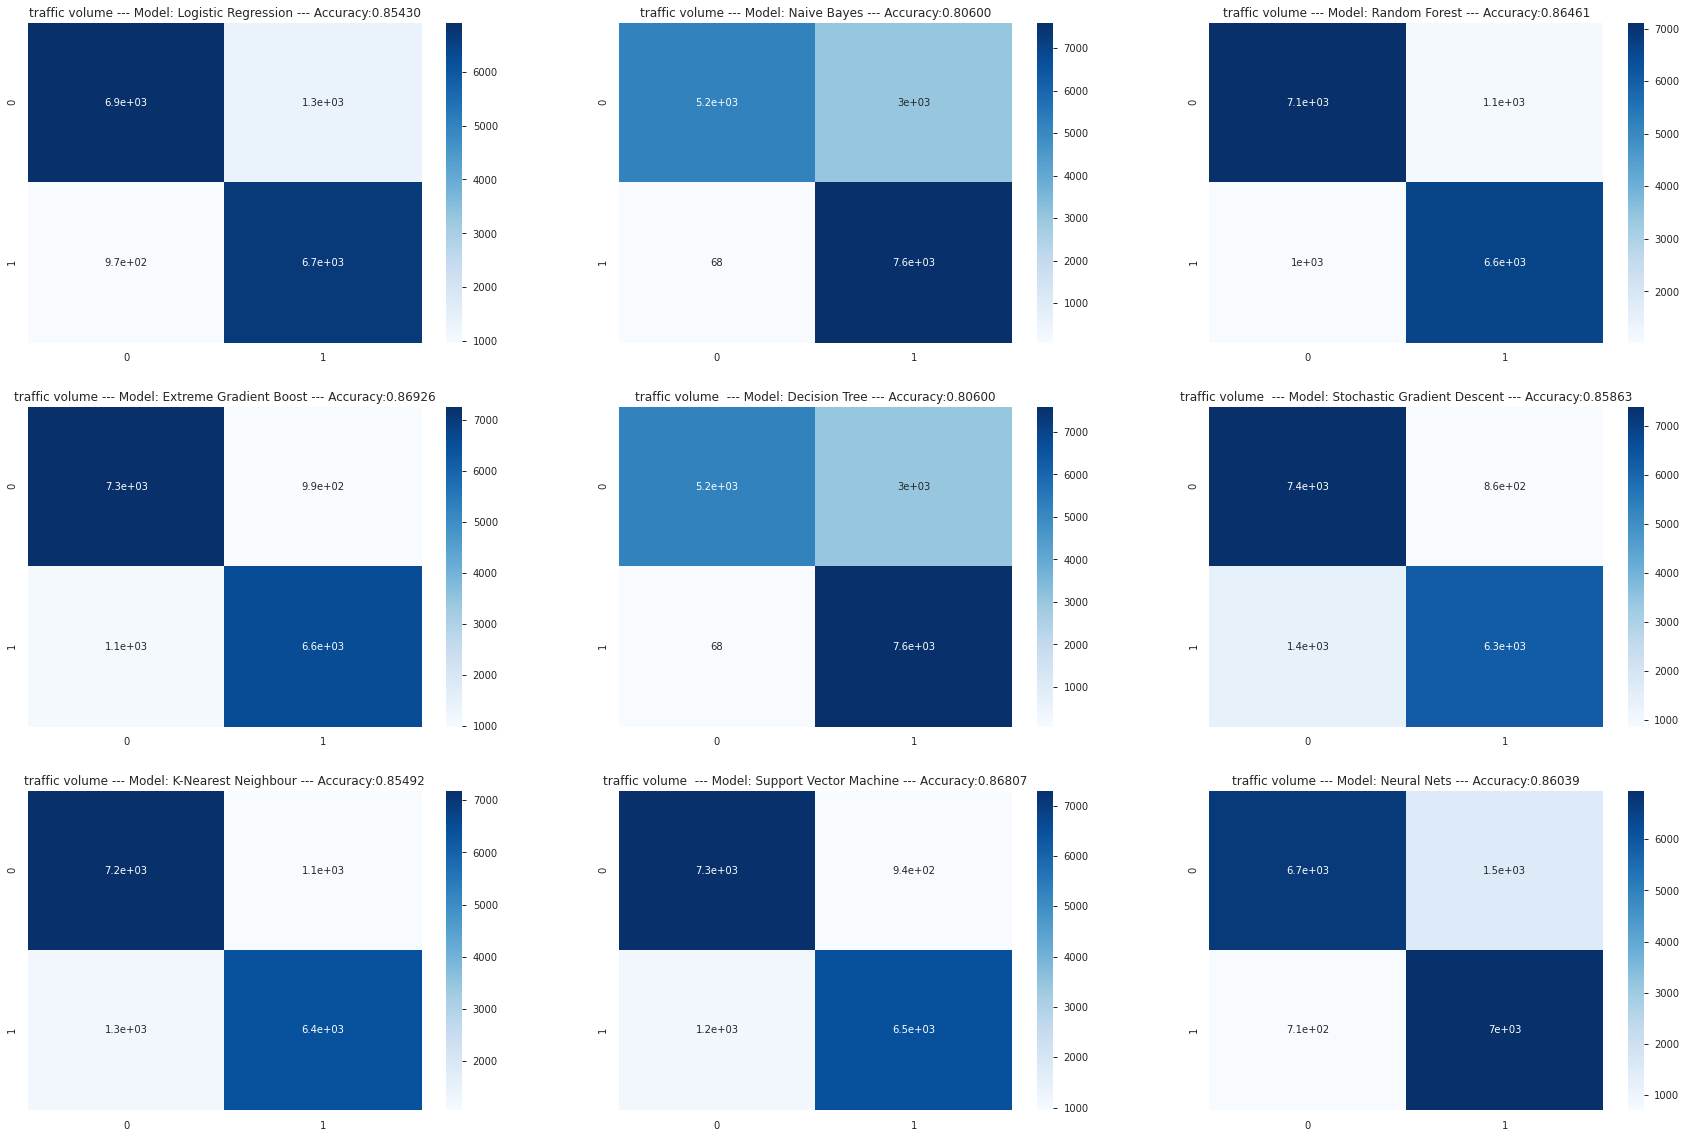

In [ ]:
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
plt.title('traffic volume --- Model: Logistic Regression --- Accuracy:{x:.5f}'.format(x=lr_acc_score))
sns.heatmap(lr_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,2)
plt.title('traffic volume --- Model: Naive Bayes --- Accuracy:{x:.5f}'.format(x=nb_acc_score))
sns.heatmap(nb_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,3)
plt.title('traffic volume --- Model: Random Forest --- Accuracy:{x:.5f}'.format(x=rf_acc_score) )
sns.heatmap(rf_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,4)
plt.title('traffic volume --- Model: Extreme Gradient Boost --- Accuracy:{x:.5f}'.format(x=xgb_acc_score))
sns.heatmap(xgb_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,7)
plt.title('traffic volume --- Model: K-Nearest Neighbour --- Accuracy:{x:.5f}'.format(x=knn_acc_score))
sns.heatmap(knn_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,5)
plt.title('traffic volume  --- Model: Decision Tree --- Accuracy:{x:.5f}'.format(x=nb_acc_score))
sns.heatmap(nb_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,8)
plt.title('traffic volume  --- Model: Support Vector Machine --- Accuracy:{x:.5f}'.format(x=svc_acc_score))
sns.heatmap(svc_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,6)
plt.title('traffic volume  --- Model: Stochastic Gradient Descent --- Accuracy:{x:.5f}'.format(x=sgdc_acc_score))
sns.heatmap(sgdc_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,9)
plt.title('traffic volume --- Model: Neural Nets --- Accuracy:{x:.5f}'.format(x=mlpc_acc_score))
sns.heatmap(mlpc_conf_matrix, annot=True, cmap="Blues")




In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost','K-NeighborsClassifier',
                    'Decision Tree', 'Stochastic Gradient Descent','Support Vector Classifier','Neural Nets'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100, sgdc_acc_score*100,svc_acc_score*100,mlpc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.429506
1,Naive Bayes,80.599925
2,Random Forest,86.460823
3,Extreme Gradient Boost,86.926173
4,K-NeighborsClassifier,85.492391
5,Decision Tree,86.636901
6,Stochastic Gradient Descent,85.863413
7,Support Vector Classifier,86.806691
8,Neural Nets,86.039492


<BarContainer object of 9 artists>

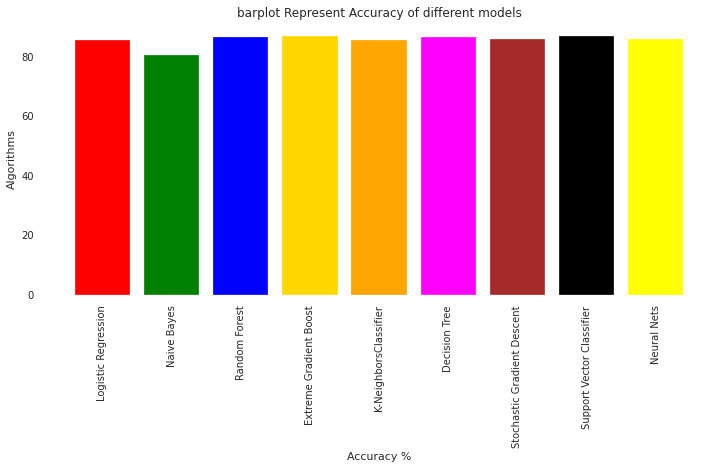

In [ ]:
colors = ['red','green','blue','gold','orange','magenta','brown','black','yellow']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.xticks(rotation=90)
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)

the best accuracy is Extreme Gradient Boost=	86.926173